In [448]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
%matplotlib inline

In [449]:
def map_entries(e):
    k, v = e.split(':')
    return (k, [float(v)])
def me2dict(d):
    return dict(list(map(map_entries, d.split(","))))


In [450]:
ALGOS = ['Sequentiall', 'Incorrect NAME', 'Parallel-2', 'Parallel-3']

In [451]:

def get_speedup(m, a):
    speedup = m.drop(columns='algo').loc[0] / m.drop(columns='algo').loc[a]
    return speedup

In [452]:
def get_data(file, algos):
    with open(file) as f:
        a = f.read().split()
        data_d = list(map(me2dict, a))
        c = 0
        for d in data_d:
            d['algo'] = [algos[c]]
            c+=1
            c%=len(algos)
        for i in range(1, len(data_d)):
            for k in data_d[0]:
                data_d[0][k] += data_d[i][k]

    df = pd.DataFrame.from_dict(data_d[0])
    return df


In [453]:
def plot(df, i):
    plt.figure(figsize=(16,16))
    a = df.loc[df['algo'] == i]
    a.drop(columns=['algo', 'buckets', 'arr_s', 'total_time']).plot(kind='bar', stacked=True)
    plt.ylabel('time_taken')
    plt.xlabel('buckets_no')
    plt.xticks([])
    plt.title(f"time for algo. {ALGOS[i]}")

def plot_s(df, i):
    a = df.drop(columns=['buckets', 'arr_s'])
    d1 = a.loc[a['algo'] == i].drop(columns='algo')
    d2 = a.loc[a['algo'] == 0].drop(columns='algo')
    d1, d2 = np.array(d1), np.array(d2)
    a = d1 / d2
    d = pd.DataFrame(data=a, columns=df.columns[2:7])
    d.plot(kind='line', stacked=True)
    plt.title(f"speedup for algo. {ALGOS[i]}")
    plt.xlabel('buckets_no')


## Seq

In [454]:
seq_df = get_data('seq-res.good.txt', [0])
# seq_df[40:100]['total_time'] += 0.05

<Figure size 1600x1600 with 0 Axes>

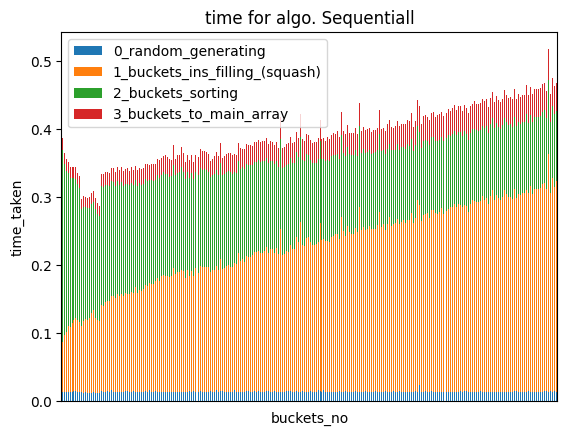

In [455]:
plot(seq_df, 0)

## Both parallel

In [456]:
df = get_data('lab2.txt', [0, 2, 3])
df.head()

,arr_s,buckets,0_random_generating,1_buckets_ins_filling_(squash),2_buckets_sorting,3_buckets_to_main_array,total_time,algo
0,10000000.0,1000.0,0.129219,0.987505,3.027916,0.167040,4.335940,0
1,10000000.0,1000.0,0.033059,0.458587,0.787683,0.031181,1.310842,2
2,10000000.0,1000.0,0.033653,0.531642,0.933256,0.058224,1.579335,3
3,10000000.0,2000.0,0.138066,1.092889,2.839885,0.166448,4.258515,0
4,10000000.0,2000.0,0.033276,0.537203,0.736848,0.031458,1.339208,2


#### total time vs buckets_no

<AxesSubplot: xlabel='buckets', ylabel='total_time'>

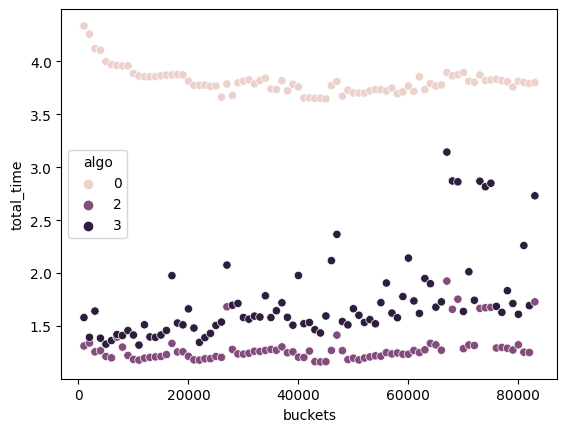

In [457]:
sns.scatterplot(data=df, x='buckets', y='total_time', hue='algo')

<Figure size 1600x1600 with 0 Axes>

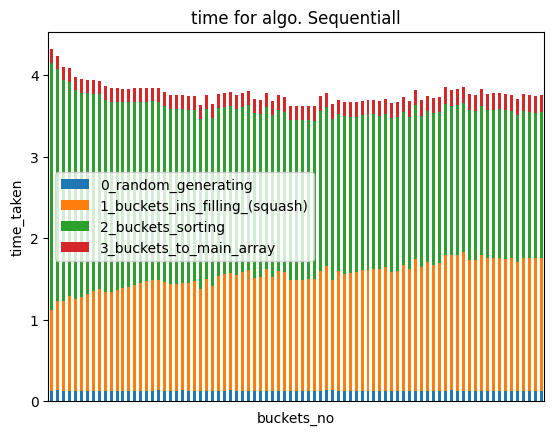

In [458]:
plot(df, 0)

<Figure size 1600x1600 with 0 Axes>

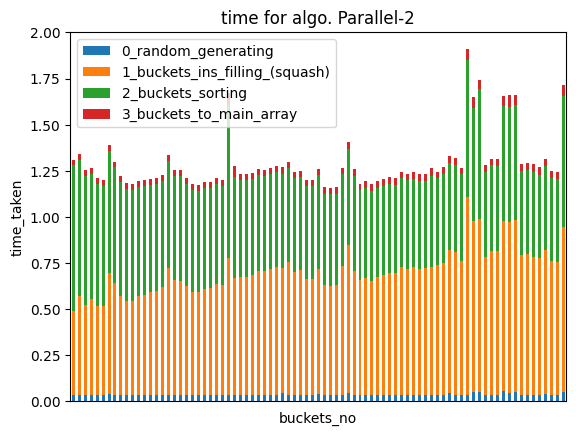

In [459]:
plot(df, 2)

<Figure size 1600x1600 with 0 Axes>

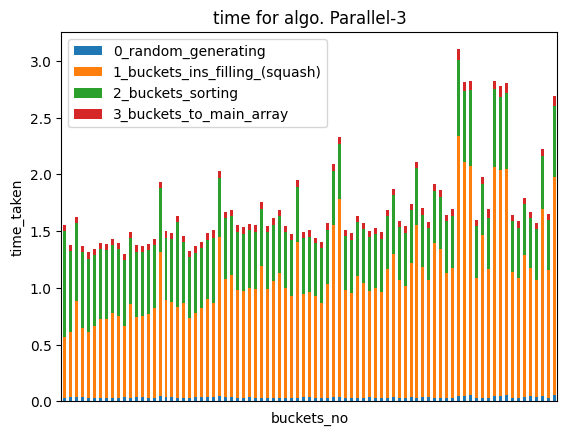

In [460]:
plot(df, 3)

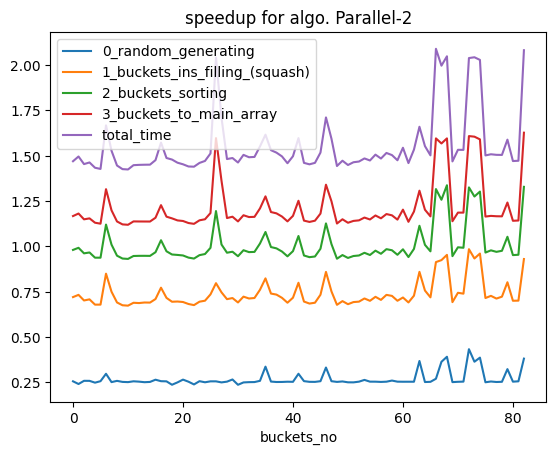

In [461]:
plot_s(df, 2)

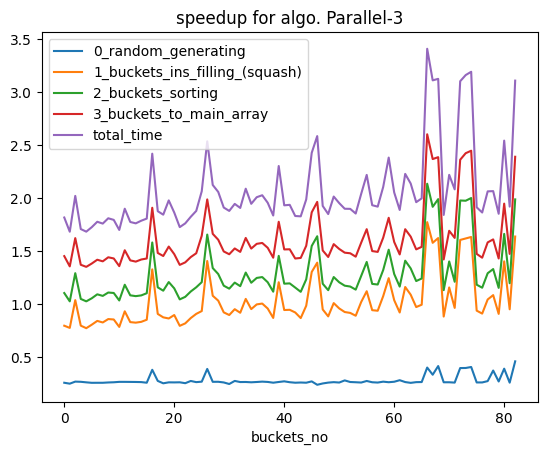

In [462]:
plot_s(df, 3)